In [ ]:
!pip install -U transformers

The model you are trying to use is gated. Please make sure you have access to it by visiting the model page.To run inference, either set HF_TOKEN in your environment variables/ Secrets or run the following cell to login. 🤗

In [ ]:
from huggingface_hub import login
login(new_session=False)

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-segmentation", model="thiagohersan/maskformer-satellite-trees")

config.json:   0%|          | 0.00/5.83k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/411M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/transformers/utils/deprecation.py:172: UserWarning: The following named arguments are not valid for `MaskFormerImageProcessor.__init__` and were ignored: '_max_size'
  return func(*args, **kwargs)
Device set to use cuda:0


In [ ]:
# Load model directly
from transformers import AutoImageProcessor, MaskFormerForInstanceSegmentation

processor = AutoImageProcessor.from_pretrained("thiagohersan/maskformer-satellite-trees")
model = MaskFormerForInstanceSegmentation.from_pretrained("thiagohersan/maskformer-satellite-trees")

In [ ]:
from PIL import Image
import torch

image_path = "/content/trees_image.tif"  # or the name of your uploaded image
image = Image.open(image_path).convert("RGB")

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")


In [ ]:
with torch.no_grad():
    outputs = model(**inputs)


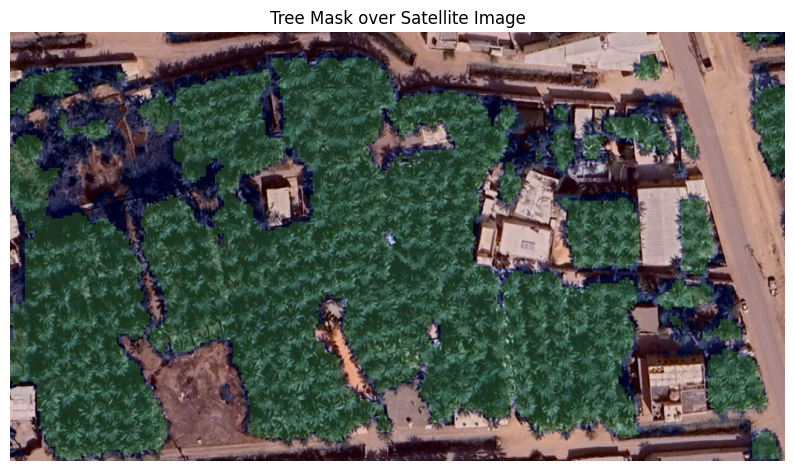

In [ ]:
# Decode the segmentation mask
results = processor.post_process_instance_segmentation(outputs, target_sizes=[image.size[::-1]])[0]

# Visualize the mask over the image
import matplotlib.pyplot as plt
import numpy as np

seg = results["segmentation"]
mask = np.array(seg)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.imshow(mask, alpha=0.2, cmap="jet")  # overlay the mask
plt.axis("off")
plt.title("Tree Mask over Satellite Image")
plt.show()
